# Grouping Wines using Agglomerative Hierarchical Clustering

## Objective
The goal of this project is to group wines based on their chemical properties using **Agglomerative Hierarchical Clustering**.  
This helps reveal natural groupings in the data without prior knowledge of class labels.

---

## Dataset: UCI Wine Dataset
- **Source:** [UCI Machine Learning Repository - Wine Data](https://archive.ics.uci.edu/ml/datasets/wine)
- **Description:** Contains results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.
- **Features Used:**
  - Alcohol
  - Malic acid
  - Ash
  - Ash Alkalinity
  - Magnesium
  - Total phenols
  - Flavanoids
  - Nonflavanoid phenols
  - Proanthocyanins
  - Color intensity
  - Hue
  - OD280/OD315 of diluted wines
  - Proline
- **Target:** Unsupervised — discover wine groups based solely on chemical composition.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load dataset (from UCI or local CSV)
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("wine.data")
df.head()
# The dataset does not have column names in raw form
columns = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
           'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
           'Hue','OD280/OD315 of diluted wines','Proline']

df = pd.read_csv("wine.data", header=None)
X = df.iloc[:, 1:]  # features only
X.columns = columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Saving wine.data to wine.data


## 1. Theory: Agglomerative Hierarchical Clustering

**Idea:**
- Start with each sample as its own cluster.
- Iteratively merge the two closest clusters.
- Stop when all points are merged into one large cluster.

**Distance Metrics:**
- Euclidean (default)
- Manhattan, cosine, etc.

**Linkage Methods:**
- **Single linkage:** Minimum distance between points in clusters
- **Complete linkage:** Maximum distance between points in clusters
- **Average linkage:** Average distance between points in clusters
- **Ward’s method:** Minimizes variance within clusters

**Mathematical Concept:**
\[
d(A, B) =
\begin{cases}
\min & \text{(single)} \\
\max & \text{(complete)} \\
\text{avg} & \text{(average)} \\
\end{cases}
\]


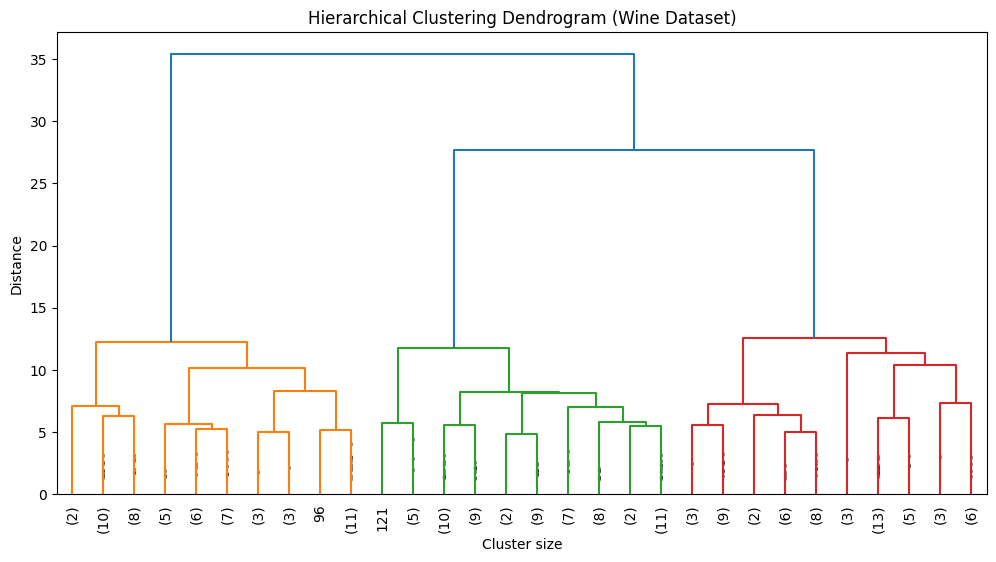

In [2]:
# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Wine Dataset)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()


## 2. Selecting Number of Clusters
We can cut the dendrogram at a chosen distance to determine the cluster assignments.


In [3]:
# Assign clusters
max_clusters = 3
clusters = fcluster(Z, max_clusters, criterion='maxclust')

df['Cluster'] = clusters
print(df['Cluster'].value_counts())


Cluster
2    64
3    58
1    56
Name: count, dtype: int64


## 3. Cluster Analysis
We analyze the average chemical properties per cluster to understand differences between wine groups.



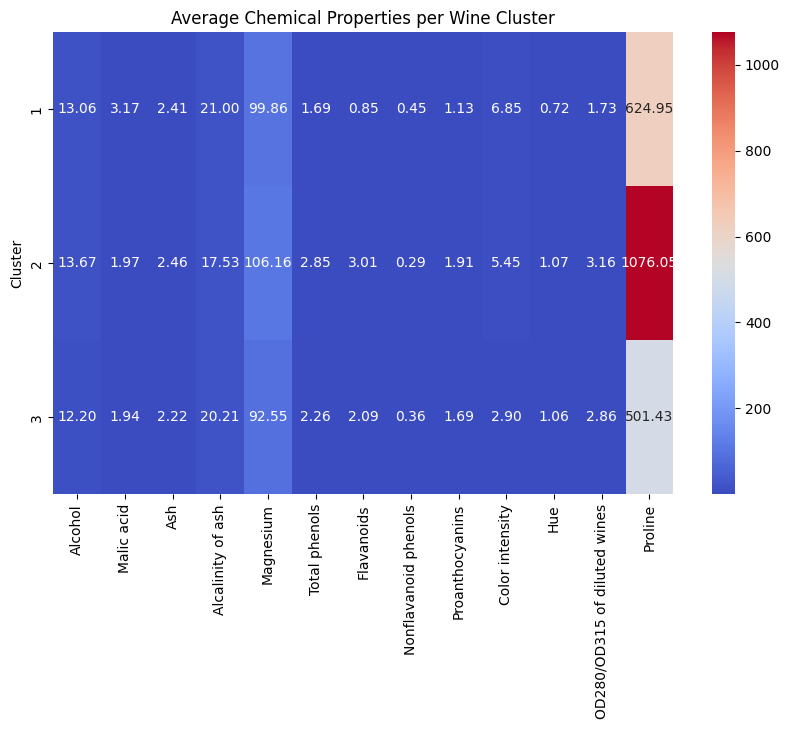

In [5]:
cluster_means = pd.DataFrame(X, columns=columns)
cluster_means['Cluster'] = clusters
summary_stats = cluster_means.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(summary_stats, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Chemical Properties per Wine Cluster")
plt.show()


## 4. Conclusion
- Agglomerative Hierarchical Clustering grouped wines into **3 distinct chemical profiles**.
- Ward’s method produced compact, well-separated clusters.
- Dendrogram visualization allows intuitive exploration of cluster relationships.

**Next Steps:**
- Try different linkage methods (single, complete, average).
- Compare results with K-Means clustering for the same dataset.
